# Step 3: Where we illustrate what happens when the data changes

In [1]:
import pandas as pd

from pond.storage.file_datastore import FileDatastore
from pond import Activity


datastore = FileDatastore(id='local_demo', base_path='./catalog')
activity = Activity(source='030_modify_data.ipynb', author='pietro', datastore=datastore, location='experiment1')


## We found a bug in the data!

The name of the index was wrong, and the results values as well, so we fix the condition2 data, and save a new version

In [9]:
condition2_fixed = pd.DataFrame(
    data=[[3], [-2], [1], [-5], [3]],
    index=pd.Index([0, 2, 4, 6, 8], name='time'),
    columns=['Results'],
)


In [3]:
activity.write(condition2_fixed, name='condition2_results', format='csv', metadata={'validated': True})

# Rerun our analysis

We want to re-run the analysis in `020_create_plot`. Here we pretend to re-run it by copy-and-pasting the same instructions, so that we can keep the demo linear

# 020 pretend re-run

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

from pond.storage.file_datastore import FileDatastore
from pond import Activity


# Notice that we use `020_create_plot.ipynb` as source, as part of this pretend re-run
activity = Activity(
    source='020_create_plot.ipynb', 
    datastore=FileDatastore(id='local_demo', base_path='./catalog'),
    location='experiment1',
    author='pietro', 
)

# Read the data from the datastore

If we don't specify a version name explicitly, `pond` loads by default the latest version


In [15]:
c1 = activity.read('condition1_results')
c2 = activity.read('condition2_results')

In [16]:
# Notice that condition_results was bumped to v2
activity.read_history

{'pond://local_demo/experiment1/condition1_results/v3',
 'pond://local_demo/experiment1/condition2_results/v2'}

# Analysis!

Our analysis in this case is just a plot

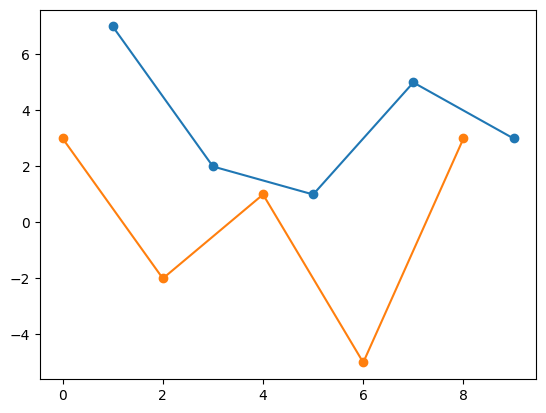

In [19]:
# You'll see that the orange line is different now, consistently with the new, corrected data!
fig = plt.figure()
plt.plot(c1, marker='o')
plt.plot(c2, marker='o')

# Save the analysis results in the datastore

A plot can be saved in the datastore, just like any other piece of data

In [20]:
version = activity.write(fig, 'analysis', metadata={'extra_info': 'Some extra information for illustration'})

In [22]:
# The new version of the metadata shows that v2 of the analysis uses v2 of `condition2_results`
version.manifest.collect()

{'user': {'extra_info': 'Some extra information for illustration'},
 'activity': {'source': '020_create_plot.ipynb',
  'author': 'pietro',
  'inputs': ['pond://local_demo/experiment1/condition1_results/v3',
   'pond://local_demo/experiment1/condition2_results/v2']},
 'version': {'uri': 'pond://local_demo/experiment1/analysis/analysis/v2',
  'filename': 'analysis_v2.png',
  'date_time': '2024-09-11 14:11:04.734867',
  'artifact_name': 'analysis'},
 'artifact': {'data_hash': '87af9da5a06b714c902eeecf0963e0cf'}}

A look at the metadata of `condition2_results/v2` shows that the data has been modified in notebook `030_modify_data`, allowing us to track exactly how the image came to be.

In [24]:
manifest = activity.read_manifest('condition2_results', version_name='v2')
manifest.collect()

{'activity': {'author': 'pietro',
  'inputs': [],
  'source': '030_modify_data.ipynb'},
 'artifact': {'data_hash': '3e999b12fe253ecdd5b9fcaaf9002888'},
 'user': {'validated': 'True'},
 'version': {'artifact_name': 'condition2_results',
  'date_time': '2024-09-11 13:58:51.854239',
  'filename': 'condition2_results_v2.csv',
  'uri': 'pond://local_demo/experiment1/condition2_results/condition2_results/v2'}}

# Reloading old versions

If we need previous versions of the data or plots, we can always load them by specifying the version number

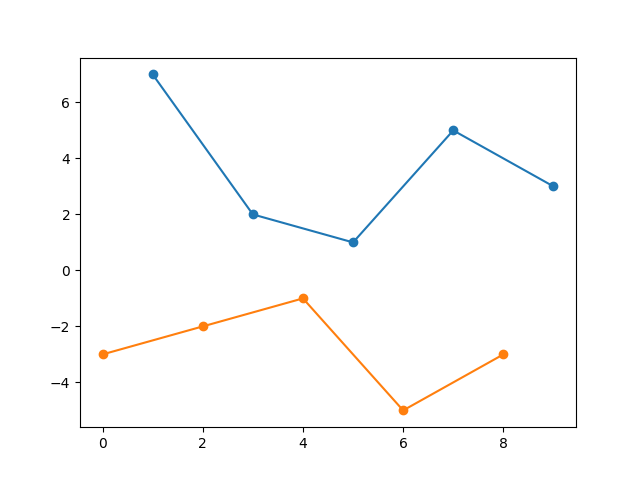

In [28]:
activity.read('analysis', version_name='v1')

In [29]:
manifest = activity.read_manifest('analysis', version_name='v1')
manifest.collect()

{'activity': {'author': 'pietro',
  'inputs': ['pond://local_demo/experiment1/condition1_results/v3',
   'pond://local_demo/experiment1/condition2_results/v1'],
  'source': '020_create_plot.ipynb'},
 'artifact': {'data_hash': '02f36ddfff9d1b39a747204ff790375a'},
 'user': {'extra_info': 'Some extra information for illustration'},
 'version': {'artifact_name': 'analysis',
  'date_time': '2024-09-11 13:57:00.950656',
  'filename': 'analysis_v1.png',
  'uri': 'pond://local_demo/experiment1/analysis/analysis/v1'}}